# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [115]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [116]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]
data

(array([[-1.02210273e+00],
        [-2.07394829e-01],
        [ 2.16770035e-01],
        [-3.42375434e-01],
        [ 3.31975374e-01],
        [-4.01367118e-01],
        [-1.90680127e+00],
        [ 1.88622307e-01],
        [ 1.01244132e+00],
        [-1.44825784e+00],
        [-2.50859086e-01],
        [-4.69717243e-02],
        [-1.48286640e-01],
        [ 1.75029837e+00],
        [-1.38788417e+00],
        [ 1.03637790e+00],
        [-1.07883130e+00],
        [ 9.88157078e-01],
        [ 6.92389361e-01],
        [-8.41758683e-01],
        [ 2.46288021e+00],
        [ 2.71403053e+00],
        [-7.72787186e-01],
        [-5.48762333e-01],
        [-4.30120103e-01],
        [-1.29120504e+00],
        [ 2.19677004e+00],
        [ 4.02051127e-01],
        [-3.80103940e-02],
        [-3.15764271e-01],
        [-5.60255114e-01],
        [-4.53952744e-01],
        [-9.38415402e-01],
        [ 9.39849921e-02],
        [-2.60040887e-01],
        [-8.56509896e-02],
        [-1.61916836e+00],
 

In [117]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS

In [118]:
hypothesis = x_train * w1+ w0
cost = np.sum((y_train- hypothesis)**2)/n_data

## Weight 초기화

In [119]:
# 괄호안에 들어가는 값은 feature의 개수
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.09860389] [0.22062919]


## y_pred 계산

In [120]:
y_pred = w0+ w1* x_train
y_pred.shape

(1000, 1)

In [121]:
y_train.shape

(1000,)

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [122]:
# broadcast 때문에 1차원, 1차원 빼기로 y_pred을 reshape 해줌. 
cost = np.sum((y_train - y_pred.reshape(-1)) ** 2) / n_data

In [123]:
cost

993324.5493484676

## Weight 업데이트

 - w1 -= (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 -= (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [124]:
np.sum((x_train * (y_train - y_pred.reshape(-1)).reshape(-1,1)))*2/n_data


-1.6211108437553048

In [125]:
np.dot((y_train-y_pred.reshape(-1)), x_train)*2/n_data

array([-1.62111084])

In [126]:
w0 -= learning_rate*(-1) * np.dot((y_train-y_pred.reshape(-1)), x_train)*2/n_data
w1 -= learning_rate * (-1) *np.sum((x_train * (y_train - y_pred.reshape(-1)).reshape(-1,1)))*2/n_data

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output 
    - clear_output()

In [127]:
epochs = 1000
learning_rate = 0.01

In [128]:
x_train.shape, y_train.shape

((1000, 1), (1000,))

In [129]:
y_pred.shape

(1000, 1)

In [130]:
epochs = 1000
learning_rate= 0.01
cost_list = []
for i in range(epochs):
    y_pred = w0+ w1* x_train
    # costlist를 cost가 줄어드는 방향으로 확인!
    cost = np.sum((y_train - y_pred.reshape(-1)) ** 2) / n_data
    cost_list.append(cost)
    w1 -= learning_rate*(-1) * np.dot((y_train-y_pred.reshape(-1)), x_train)*2/n_data
    w0 -= learning_rate * (-1) *np.sum(y_train - y_pred.reshape(-1))*2/n_data


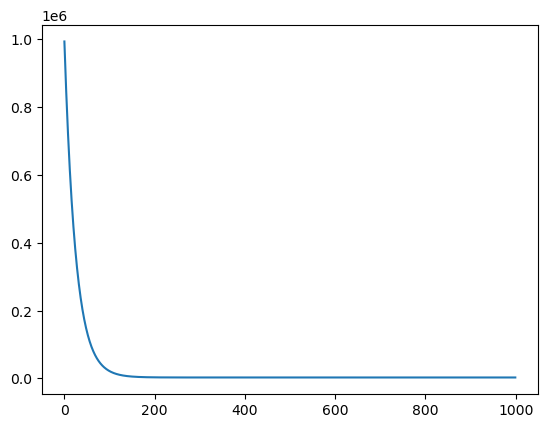

In [131]:
plt.plot(cost_list)

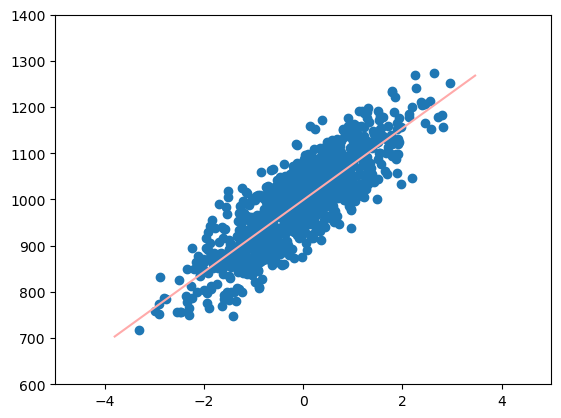

In [132]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data[0], data[1])

plt.xlim(-5,5)
plt.ylim(600, 1400)
graph_x= np.linspace(x_train.min()-0.5, x_train.max()+0.5, 2)
graph_y = graph_x*w1+w0

plt.plot(graph_x, graph_y, color = '#faa')
plt.show()

In [136]:
# Multi Feature
 # 가상의 데이터 생성
w1 = np.random.rand(100)
w0 = np.random.rand(1)
data = make_regression(n_samples = 1000, n_features = 100, bias = 1000, noise = 50) 
x_train = data[0]
y_train  = data[1]
n_data = len(x_train)

epochs = 1000
learning_rate= 0.01
cost_list = []

for i in range(epochs):
    y_pred = np.dot(x_train, w1)+w0
    # costlist를 cost가 줄어드는 방향으로 확인!
    cost = np.sum((y_train - y_pred.reshape(-1)) ** 2) / n_data
    cost_list.append(cost)
    w1 -= learning_rate*(-1) * np.dot((y_train-y_pred.reshape(-1)), x_train)*2/n_data
    w0 -= learning_rate * (-1) *np.sum(y_train - y_pred.reshape(-1))*2/n_data



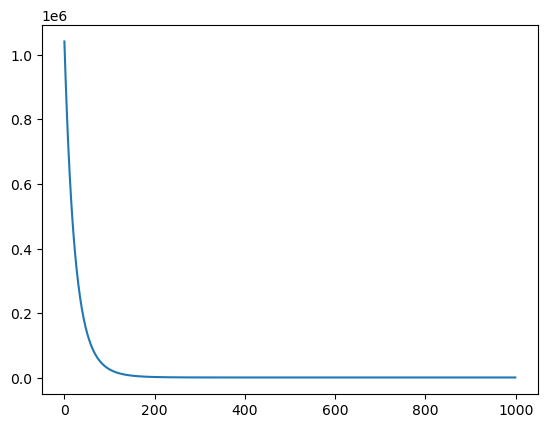

In [137]:
plt.plot(cost_list)